# Project 2

Instructions

Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
What can you infer about each of the distinct groups?

Group (The DataDriven Team): Susanna Wong, Puja Roy, Mikhail Broomes & Marjete Vucinaj, Danny & Mohammed Rahman

Video : https://drive.google.com/file/d/1S9e1K5TDRr6f52v3iB6StbIGbLVf97WM/view?usp=sharing

In [ ]:
import csv
import pandas as pd
import requests
import io
import networkx as nx
import math
import community
import numpy as np
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt
%matplotlib inline





The dataset from MovieLens includes 5-star ratings and free-text tags for movies; obtained from [kaggle](https://www.kaggle.com/datasets/shubhammehta21/movie-lens-small-latest-dataset/data). It contains 100,836 ratings and 3,683 tag applications, or genres,  across 9,742 movies. 610 different users contributed their ratings and tags to the dataset between March 29, 1996, and September 24, 2018. The dataset randomly selected users who had rated at least 20 movies, with no demographic information included.

Users are represented by an ID only. The data files are links.csv, movies.csv, ratings.csv, and tags.csv.

In [ ]:
links = pd.read_csv("https://raw.githubusercontent.com/MAB592/Data620/main/Assignments/Project%202/links.csv")
movies = pd.read_csv("https://raw.githubusercontent.com/MAB592/Data620/main/Assignments/Project%202/movies.csv")
ratings = pd.read_csv("https://raw.githubusercontent.com/MAB592/Data620/main/Assignments/Project%202/ratings.csv")
tags = pd.read_csv("https://raw.githubusercontent.com/MAB592/Data620/main/Assignments/Project%202/tags.csv")

In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


Join ratings and movies dataframes, join mov_rat with tags dataframe, and join mov_rat_tag with links dataframe. To differentiate columns with the same name in the joined dataframe rsuffix='_links' is used and then the result is assigned to df.

In [ ]:
mov_rat = ratings.join(movies, on='movieId', how='inner', lsuffix='_ratings', rsuffix='_movies')

mov_rat_tag = mov_rat.join(tags, on='movieId', how='inner', rsuffix='_tags')

final_df = mov_rat_tag.join(links, on='movieId', how='inner', rsuffix='_links')

df = final_df

df.head()

,movieId,userId,movieId_ratings,rating,timestamp,movieId_movies,title,genres,userId_tags,movieId_tags,tag,timestamp_tags,movieId_links,imdbId,tmdbId
0,1,1,1,4.0,964982703,2,Jumanji (1995),Adventure|Children|Fantasy,2,60756,Highly quotable,1445714996,2,113497,8844.0
516,1,5,1,4.0,847434962,2,Jumanji (1995),Adventure|Children|Fantasy,2,60756,Highly quotable,1445714996,2,113497,8844.0
874,1,7,1,4.5,1106635946,2,Jumanji (1995),Adventure|Children|Fantasy,2,60756,Highly quotable,1445714996,2,113497,8844.0
1434,1,15,1,2.5,1510577970,2,Jumanji (1995),Adventure|Children|Fantasy,2,60756,Highly quotable,1445714996,2,113497,8844.0
1667,1,17,1,4.5,1305696483,2,Jumanji (1995),Adventure|Children|Fantasy,2,60756,Highly quotable,1445714996,2,113497,8844.0


In [ ]:
unique_users = df['userId'].unique()

total_users = len(unique_users)

print(f" unique users: {total_users}")

 unique users: 610


Initialize Graph, add nodes for users and to indicate that these nodes belong to the first partite set use bipartite=0. Add nodes for movies and use bipartite=1 so nodes belong to the second partite set.

In [ ]:
G = nx.Graph()
G.add_nodes_from(df['userId'].unique(), bipartite=0)
G.add_nodes_from(df['movieId'].unique(), bipartite=1)

Iterate through dataframe rows, and add edges to the graph.



In [ ]:
edges = [(row['userId'], row['movieId']) for idx, row in df.iterrows()]
G.add_edges_from(edges)

Set up the figure size, create the layout for nodes, and draw  the bipartite graph including titles and labels. This visualization shows the relationships between users (userId) and movies (movieID) in the dataset.

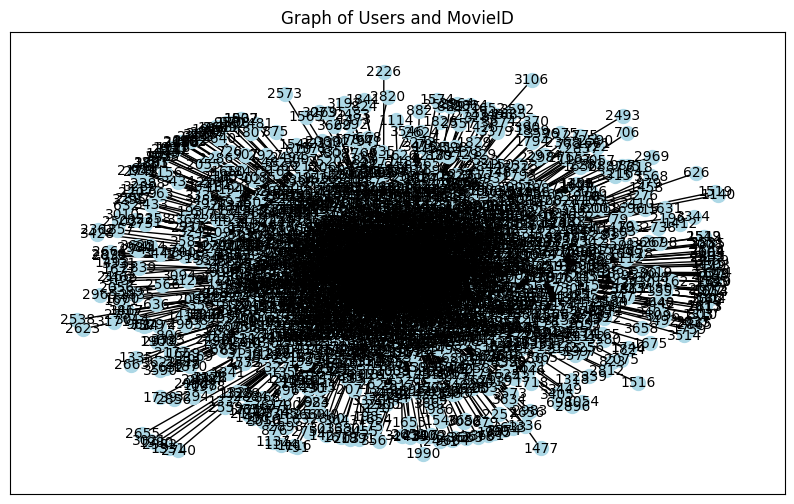

In [ ]:
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10)
plt.title('Graph of Users and MovieID')
plt.show()

Create a network of users (nodes), green, based on their interactions(edges) with movies. Filter to include only the largest connected component of users. Use logarithm of interaction counts, which iterates through each edge, to visualize strength of connection or edges.

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


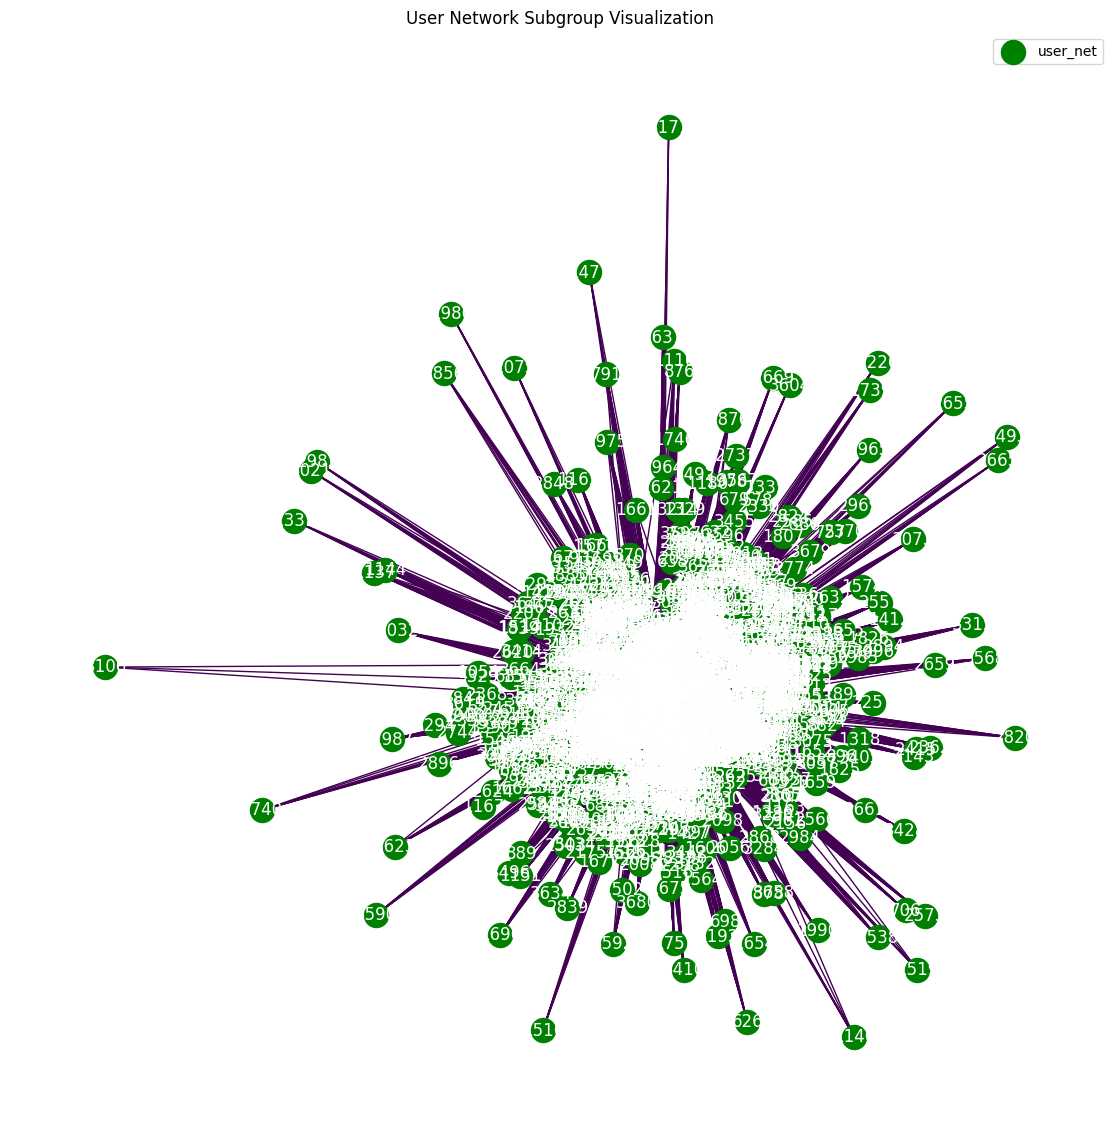

In [ ]:
user_net = nx.bipartite.weighted_projected_graph(G, unique_users)

largest_component = max(nx.connected_components(user_net), key=len)
user_net = user_net.subgraph(largest_component).copy()

weights = [math.log(edata['weight']) for u, v, edata in user_net.edges(data=True)]

plt.figure(figsize=(11, 11))
pos = nx.spring_layout(user_net)
nx.draw(user_net, pos, node_color='g', with_labels=True, node_size=300, font_color='w', edge_color=weights, cmap=plt.cm.Blues)
plt.title('User Network Subgroup Visualization')
plt.legend(["user_net"])
plt.show()

In [ ]:
len(user_net)

2828

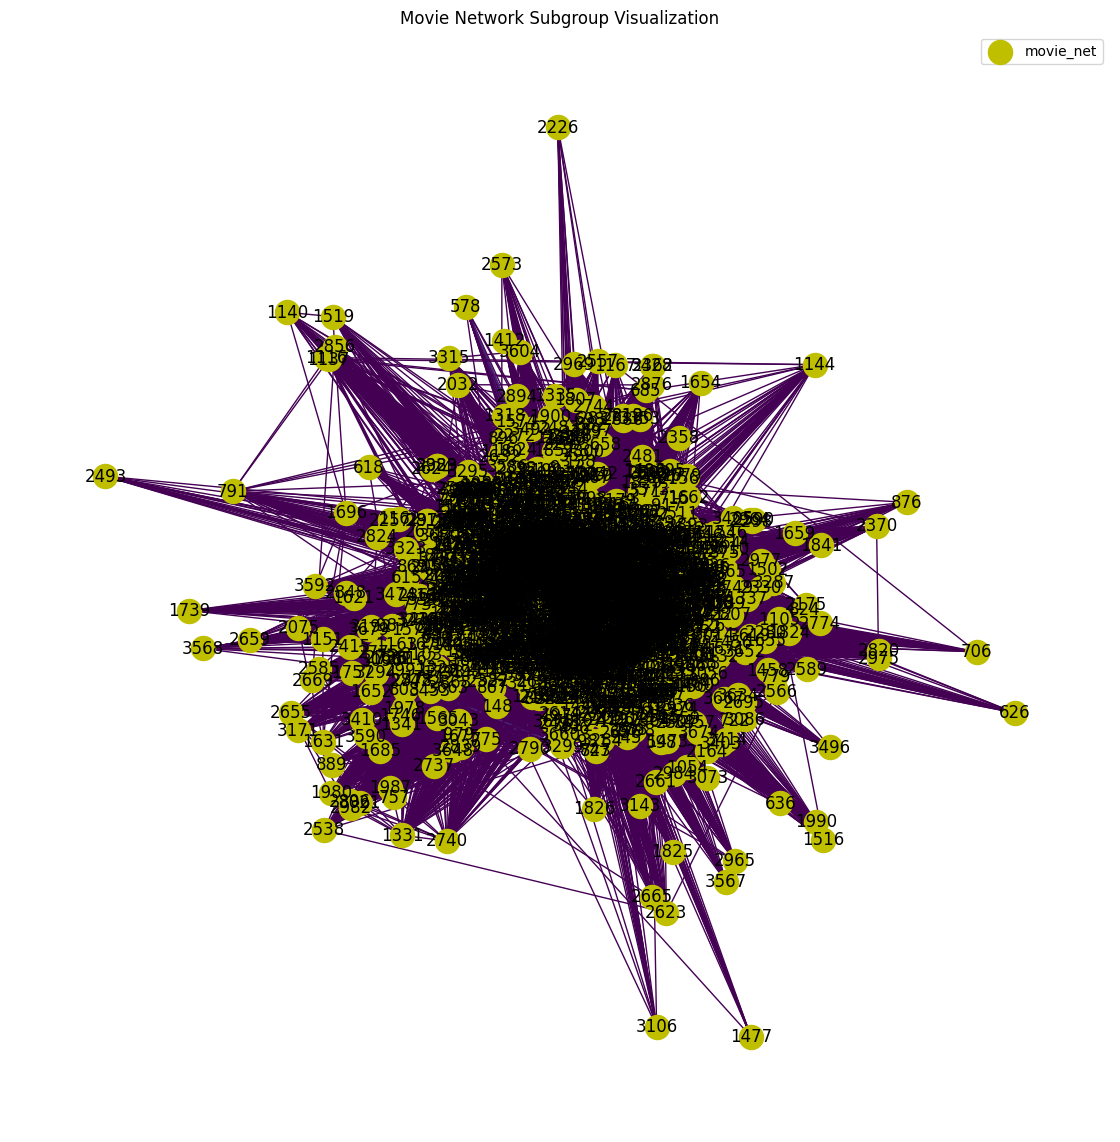

In [ ]:
movie_net = nx.bipartite.weighted_projected_graph(G, df['movieId'].unique())

# Get the largest connected component of the movie network
largest_component = max(nx.connected_components(movie_net), key=len)
movie_net = movie_net.subgraph(largest_component).copy()

# Calculate logarithm of edge weights for visualization
weights = [math.log(edata['weight']) for u, v, edata in movie_net.edges(data=True)]

# Plotting the movie network
plt.figure(figsize=(11, 11))
pos = nx.spring_layout(movie_net)  # Layout algorithm for node positioning
nx.draw(movie_net, pos, node_color='y', with_labels=True, node_size=300, font_color='k', edge_color=weights, cmap=plt.cm.Blues)
plt.title('Movie Network Subgroup Visualization')
plt.legend(["movie_net"])
plt.show()





In [ ]:
len(movie_net)

2828

Here a function was created to trim the edges based on their weight which reduced the overall size of the graph  

In [ ]:
def trim_edges(g, weight=1):
    g2 = nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight']> weight:
            g2.add_edge(f,to,**edata)
    return g2

Applying the trim function to the movienet subset


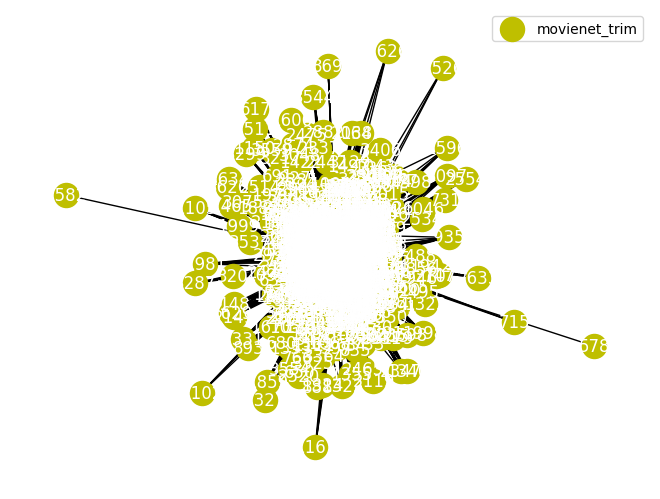

In [ ]:
movienet_trim = trim_edges(movie_net, weight=math.exp(0.99))
weights = [edata['weight'] for f,t,edata in movienet_trim.edges(data=True)]

nx.draw_spring(movienet_trim, label = 'movienet_trim', node_color='y',with_labels=True,node_size =300,font_color ='w')
plt.legend(["movienet_trim"])
plt.show()

Here is the reduced size of the movienet subset using the len function

In [ ]:
len(movienet_trim)

2286

Applying the trim function to the usernet subset

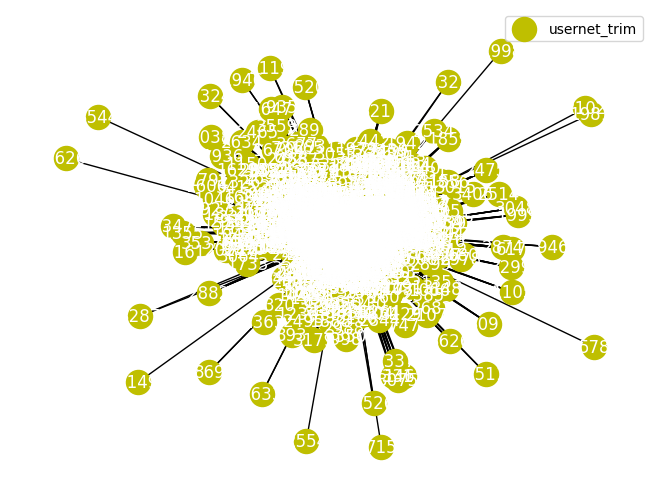

In [ ]:
usernet_trim = trim_edges(user_net, weight=math.exp(0.99))
weights = [edata['weight'] for f,t,edata in usernet_trim.edges(data=True)]

nx.draw_spring(usernet_trim, label = 'usernet_trim', node_color='y',with_labels=True,node_size =300,font_color ='w')
plt.legend(["usernet_trim"])
plt.show()

Here is the reduced size of the usernet subset using the len function

In [ ]:
len(usernet_trim)

2281

Extracting edge weights from the graphs and getting their maximum and minimum values

> Add blockquote







In [ ]:
weights= [edata['weight'] for f,to,edata in movienet_trim.edges(data=True)]
mn = int(min(weights))
mx = int(max(weights))

Creating the function for the island method and applying it to the movie_trim

In [ ]:
def island_method(movienet_trim, iterations=10):
    step =((mx - mn)/iterations)
    return [[threshold, trim_edges(movienet_trim, threshold)] for threshold in np.arange(mn,mx,step)]

In [ ]:
subgraphs2 = island_method(movienet_trim, iterations=5)


In [ ]:
for threshold, subgraph in subgraphs:
    print(f"Threshold: {threshold}, Number of Edges: {len(subgraph.edges())}")

Threshold: 3.0, Number of Edges: 795546
Threshold: 152.2, Number of Edges: 910
Threshold: 301.4, Number of Edges: 91
Threshold: 450.59999999999997, Number of Edges: 11
Threshold: 599.8, Number of Edges: 2


In [ ]:
def island_method(usernet_trim, iterations=10):
    step =((mx - mn)/iterations)
    return [[threshold, trim_edges(usernet_trim, threshold)] for threshold in np.arange(mn,mx,step)]

In [ ]:
subgraphs2 = island_method(usernet_trim, iterations=5)


In [ ]:
for threshold, subgraph in subgraphs2:
    print(f"Threshold: {threshold}, Number of Edges: {len(subgraph.edges())}")

Threshold: 3.0, Number of Edges: 429784
Threshold: 152.2, Number of Edges: 911
Threshold: 301.4, Number of Edges: 91
Threshold: 450.59999999999997, Number of Edges: 11
Threshold: 599.8, Number of Edges: 2


At the higher thresholds of our subgroups the number of edges seem to be identical as opposed to the lower threshold there is a notable difference between the two. The higher thresholds may suggest the there is a more precise relationship between the users and movies and not so much at the lower thresholds.

Are the graphs directed?

In [ ]:
user_ud = usernet_trim.to_undirected()
fb_components = nx.connected_components(user_ud)
nx.is_directed(user_ud)

False

In [ ]:
movie_ud = movienet_trim.to_undirected()
fb_components = nx.connected_components(movie_ud)
nx.is_directed(movie_ud)

False

Looking at Centrality between the groups

In [ ]:
def sorted_map(map):
    ms = sorted(map.items(), key=lambda x: (-x[1], x[0]))
    return ms

In [ ]:
# Degree Centrality for users
dcent = nx.degree_centrality(user_ud)
dcent_s = sorted(dcent.items(), key=lambda item: item[1], reverse=True)
print(dcent_s[:5])

[(260, 0.9596491228070175), (356, 0.9565789473684211), (608, 0.9508771929824562), (1, 0.9372807017543859), (296, 0.9364035087719298)]


In [ ]:
# Degree Centrality for movieID
dcent2 = nx.degree_centrality(user_ud)
dcent_s2 = sorted(dcent.items(), key=lambda item: item[1], reverse=True)
print(dcent_s2[:5])

[(260, 0.9596491228070175), (356, 0.9565789473684211), (608, 0.9508771929824562), (1, 0.9372807017543859), (296, 0.9364035087719298)]


Closeness Centrality

In [ ]:
# Closeness Centrality for users
ccent = nx.closeness_centrality(user_ud)
ccent_s = sorted(ccent.items(), key=lambda item: item[1], reverse=True)
print(ccent_s[:5])

[(260, 0.9612141652613828), (356, 0.9583858764186634), (608, 0.9531772575250836), (1, 0.94098225340487), (296, 0.9402061855670103)]


In [ ]:
# Closeness Centrality for MovieID
ccent2 = nx.closeness_centrality(movie_ud)
ccent_s2 = sorted(ccent.items(), key=lambda item: item[1], reverse=True)
print(ccent_s2[:5])

[(260, 0.9612141652613828), (356, 0.9583858764186634), (608, 0.9531772575250836), (1, 0.94098225340487), (296, 0.9402061855670103)]


Betweenness Centrality

In [ ]:
# Betweenness Centrality for Users
bcent = nx.betweenness_centrality(user_ud)
bcent_s = sorted(bcent.items(), key=lambda item: item[1], reverse=True)
print(bcent_s[:5])

KeyboardInterrupt: 

In [ ]:
# Betweenness Centrality for Movies
bcent2 = nx.betweenness_centrality(movie_ud)
bcent_s2 = sorted(bcent.items(), key=lambda item: item[1], reverse=True)
print(bcent_s2[:5])

KeyboardInterrupt: 

These additions would explicitly address the questions about dataset selection, network size reduction, and inference about distinct groups within the network. They enhance the analysis by adding community detection and deeper exploration of centrality measures within identified groups.